In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (semicolon-separated, comma as decimal)
df = pd.read_csv('data/Nominal_Housing_Prices_2025_Q3.csv', 
                 sep=';', 
                 decimal=',',
                 index_col=0)

# Display the first few rows to verify
df.head()

,Australia,Belgium,Canada,Switzerland,Germany,Denmark,Spain,Finland,France,UK,...,US,S. Africa,Croatia,Israel,Slovenia,Colombia,Portugal,Unnamed: 27,Aggregate - 2005 Fixed Weights,Aggregate - Dynamic Weights
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All countries,All countries
1975:Q1,7.59,15.18,16.24,48.83,51.99,15.93,8.67,13.49,11.10,5.87,...,17.24,3.56,0.0,0.0,0.0,1.56,3.30,NaN,"22,13","22,97"
1975:Q2,7.75,15.93,16.46,48.19,52.59,16.40,9.70,13.64,11.50,5.99,...,17.46,3.63,0.0,0.0,0.0,1.57,3.48,NaN,"22,40","23,24"
1975:Q3,8.05,16.74,17.17,47.73,53.24,17.20,9.91,13.83,11.91,6.12,...,17.59,3.64,0.0,0.0,0.0,1.60,3.66,NaN,"22,65","23,49"
1975:Q4,8.29,17.65,17.42,47.14,53.95,17.30,10.65,14.20,12.39,6.31,...,17.87,3.72,0.0,0.0,0.0,1.64,3.86,NaN,"22,99","23,82"


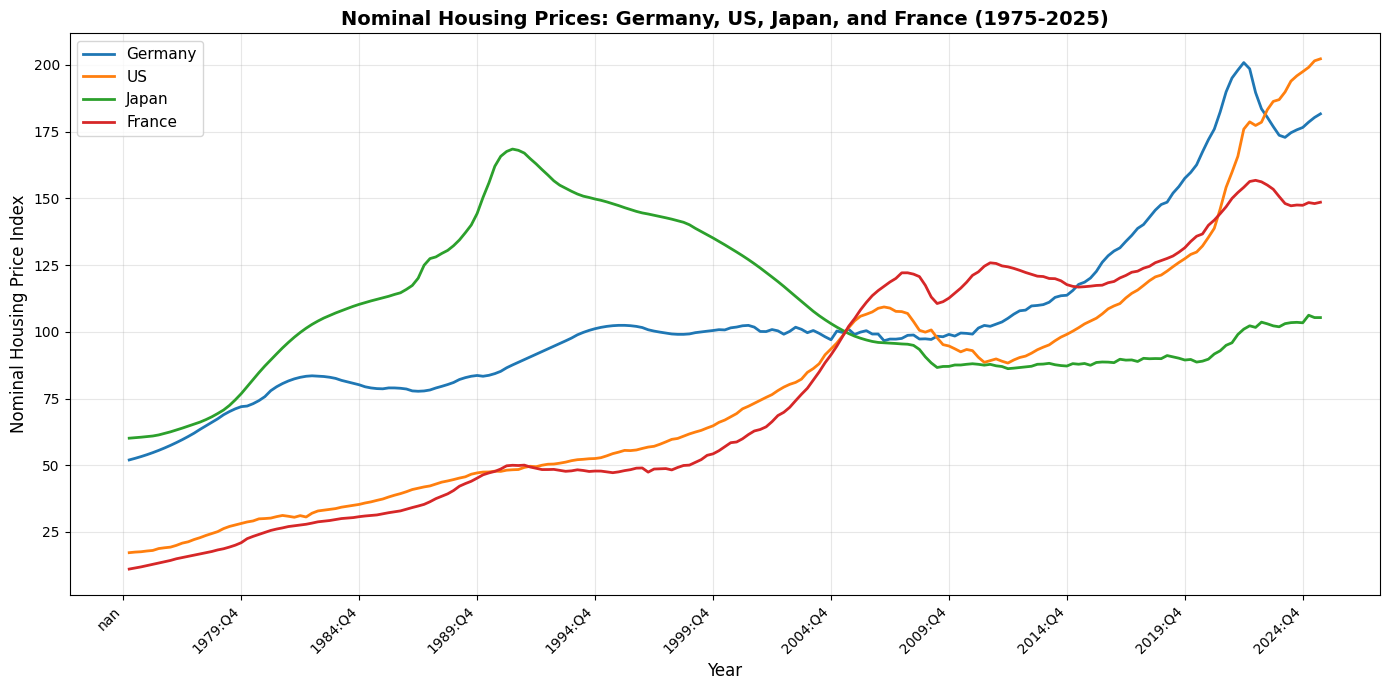

In [3]:
# Select the countries: Germany, US, Japan, and France
countries = ['Germany', 'US', 'Japan', 'France']

# Create the plot
plt.figure(figsize=(14, 7))

# Create numeric x-axis for plotting
x = range(len(df))

for country in countries:
    plt.plot(x, df[country], linewidth=2, label=country)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Nominal Housing Price Index', fontsize=12)
plt.title('Nominal Housing Prices: Germany, US, Japan, and France (1975-2025)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)

# Set x-tick labels at regular intervals (every 20 quarters = 5 years)
tick_positions = range(0, len(df), 20)
tick_labels = [df.index[i] for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

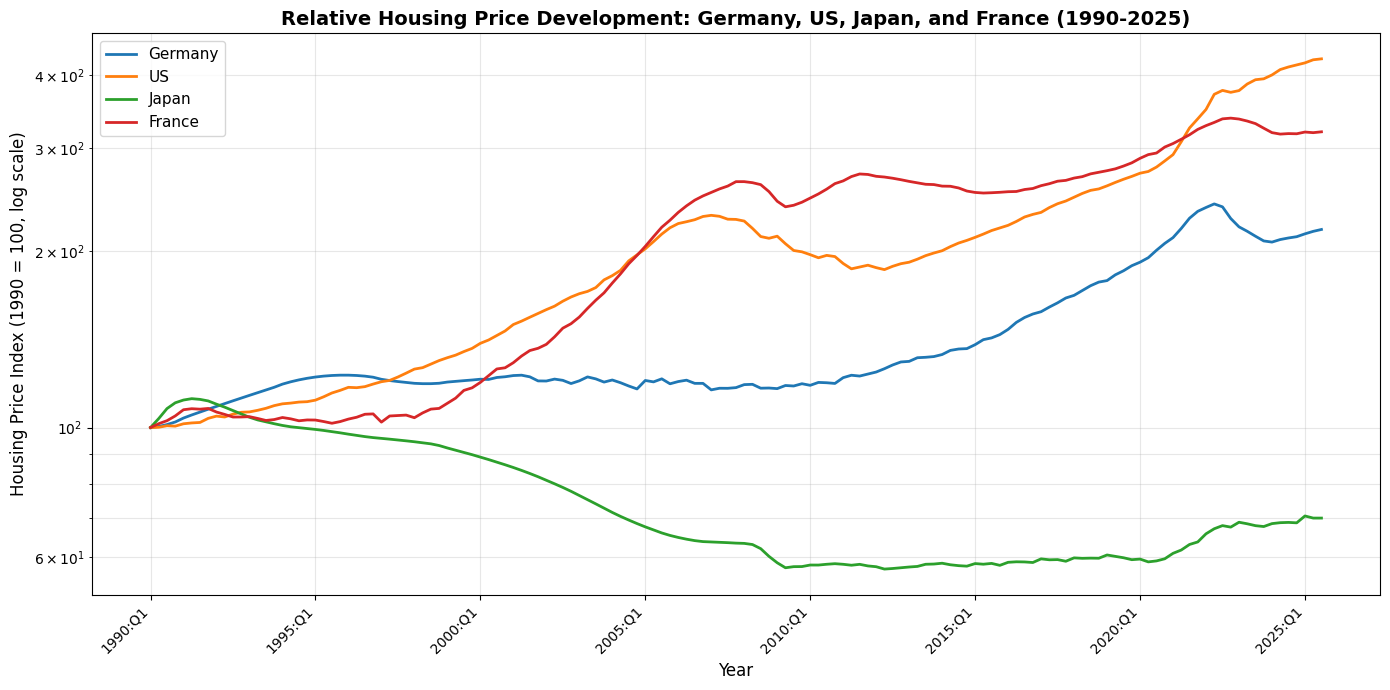

In [4]:
# Select the countries: Germany, US, Japan, and France
countries = ['Germany', 'US', 'Japan', 'France']

# Normalize to 1990:Q1 = 100
base_year = '1990:Q1'
df_normalized = df[countries].copy()

for country in countries:
    base_value = df.loc[base_year, country]
    df_normalized[country] = (df[country] / base_value) * 100

# Filter data from 1990 onwards
df_normalized = df_normalized.loc[base_year:]

# Create the plot
plt.figure(figsize=(14, 7))

# Create numeric x-axis for plotting
x = range(len(df_normalized))

for country in countries:
    plt.plot(x, df_normalized[country], linewidth=2, label=country)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Housing Price Index (1990 = 100, log scale)', fontsize=12)
plt.title('Relative Housing Price Development: Germany, US, Japan, and France (1990-2025)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.yscale('log')

# Set x-tick labels at regular intervals (every 20 quarters = 5 years)
tick_positions = range(0, len(df_normalized), 20)
tick_labels = [df_normalized.index[i] for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [5]:
import yfinance as yf

# Define stock indices for each country
stock_indices = {
    'Japan': '^N225',      # Nikkei 225
    'US': '^GSPC',         # S&P 500
    'Germany': '^GDAXI',   # DAX
    'France': '^FCHI'      # CAC 40
}

# Download stock data from 1990 onwards
stock_data = {}
for country, ticker in stock_indices.items():
    print(f"Downloading {country} stock data...")
    data = yf.download(ticker, start='1990-01-01', end='2026-02-12', progress=False)
    stock_data[country] = data['Close']

print("Stock data download complete!")

Stock data download complete!


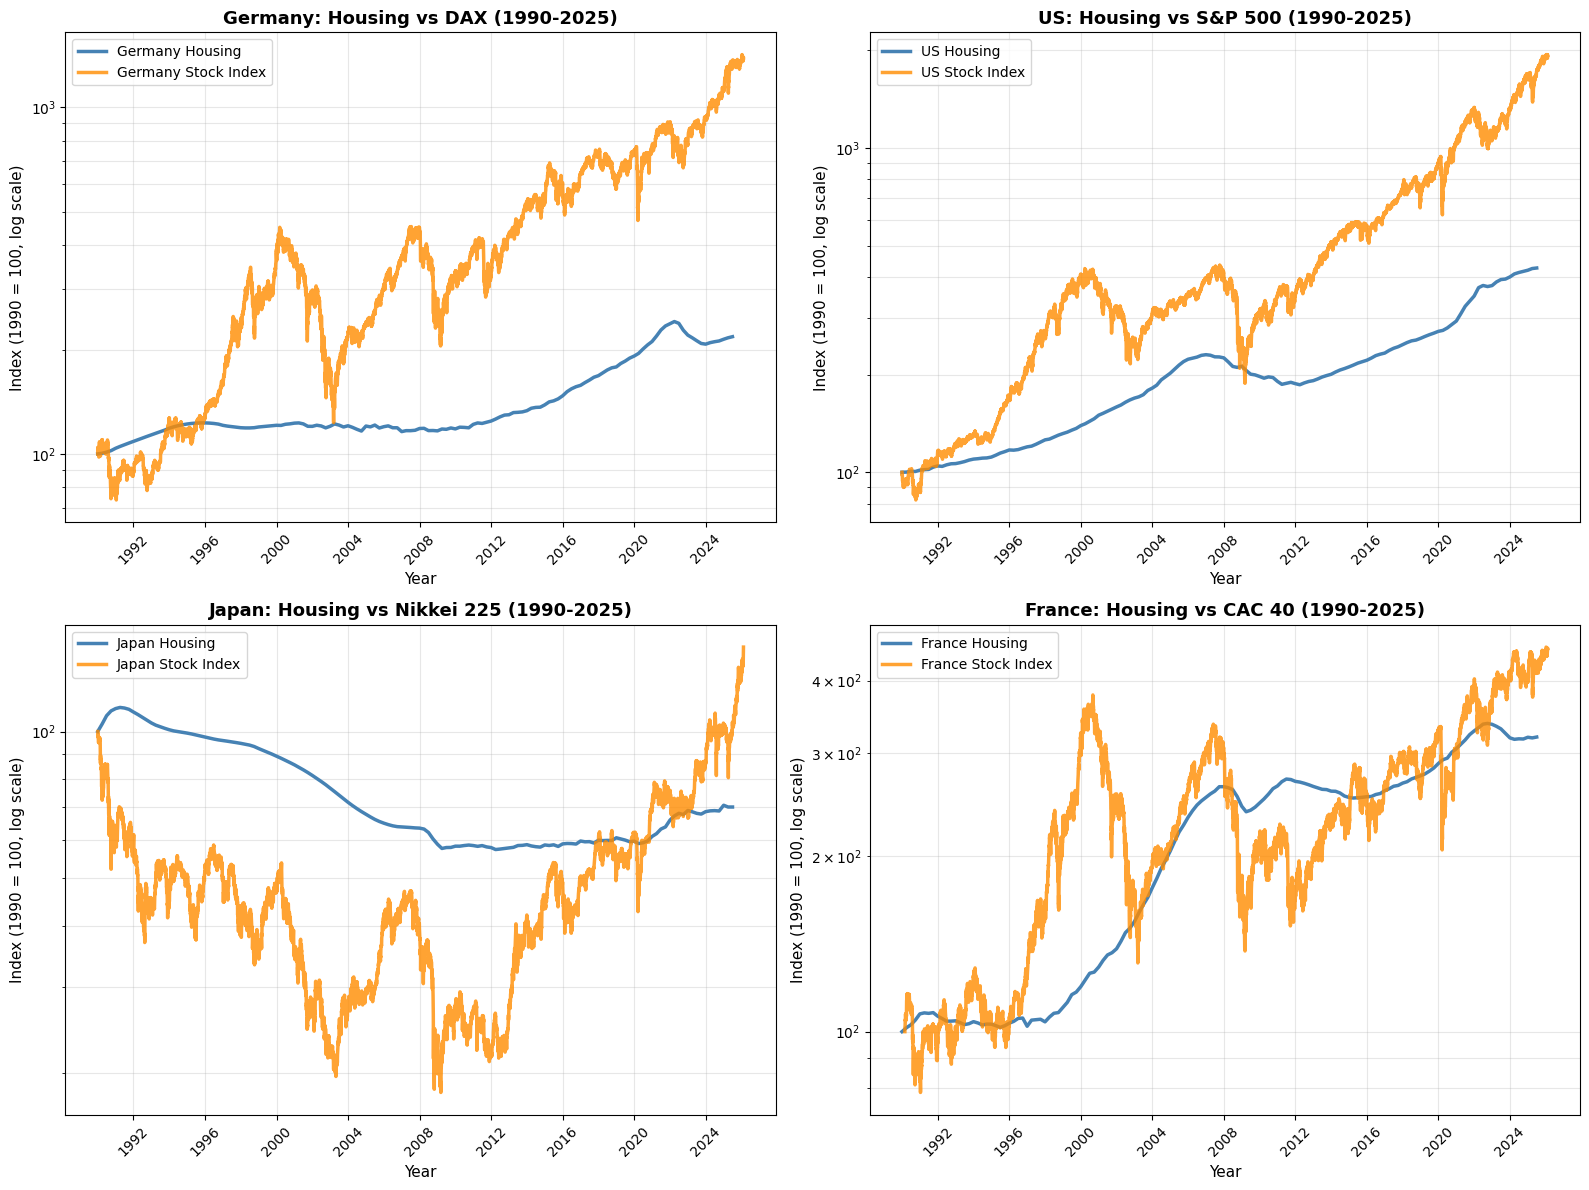

In [6]:
# Normalize stock indices to 100 at 1990
stock_normalized = {}
for country in countries:
    # Get the first available value in 1990
    stock_series = stock_data[country]
    stock_1990 = stock_series[stock_series.index.year == 1990].iloc[0]
    stock_normalized[country] = (stock_series / stock_1990) * 100

# Convert housing data index from "YYYY:QX" format to datetime
def convert_quarter_to_datetime(q_str):
    year, quarter = q_str.split(':')
    quarter_num = int(quarter[1])  # Extract number from 'Q1' -> 1
    month = (quarter_num - 1) * 3 + 1  # Q1->1, Q2->4, Q3->7, Q4->10
    return pd.Timestamp(year=int(year), month=month, day=1)

df_normalized_dt = df_normalized.copy()
df_normalized_dt.index = df_normalized_dt.index.map(convert_quarter_to_datetime)

# Create 4 separate plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, country in enumerate(countries):
    ax = axes[idx]
    
    # Plot housing prices
    ax.plot(df_normalized_dt.index, df_normalized_dt[country], 
            linewidth=2.5, label=f'{country} Housing', color='steelblue')
    
    # Plot stock index
    ax.plot(stock_normalized[country].index, stock_normalized[country], 
            linewidth=2.5, label=f'{country} Stock Index', color='darkorange', alpha=0.8)
    
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Index (1990 = 100, log scale)', fontsize=11)
    
    # Set country-specific titles with index names
    index_names = {'Japan': 'Nikkei 225', 'US': 'S&P 500', 'Germany': 'DAX', 'France': 'CAC 40'}
    ax.set_title(f'{country}: Housing vs {index_names[country]} (1990-2025)', 
                 fontsize=13, fontweight='bold')
    
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3, which='both')
    ax.set_yscale('log')
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# Load Germany-specific housing price data
df_germany = pd.read_csv('data/Germany_Housing_Price_Index.csv', sep=';', decimal=',')

# Convert date format from "Q1 1990" to datetime
def convert_german_quarter_to_datetime(q_str):
    parts = q_str.strip().split()
    quarter = parts[0]  # 'Q1', 'Q2', etc.
    year = parts[1]     # '1990', etc.
    quarter_num = int(quarter[1])
    month = (quarter_num - 1) * 3 + 1
    return pd.Timestamp(year=int(year), month=month, day=1)

df_germany['date'] = df_germany['date'].apply(convert_german_quarter_to_datetime)
df_germany = df_germany.set_index('date')

# Display the first few rows
df_germany.head()

,GREIX (Eigentumswohnungen),Frankfurt am Main (Eigentumswohnungen),Berlin (Eigentumswohnungen),München (Eigentumswohnungen)
date,,,,
1990-01-01,84.58,88.47,78.84,82.55
1990-04-01,87.10,90.79,83.35,85.70
1990-07-01,90.32,91.39,88.88,86.54
1990-10-01,90.77,96.87,91.57,89.60
1991-01-01,93.11,104.29,92.49,91.20


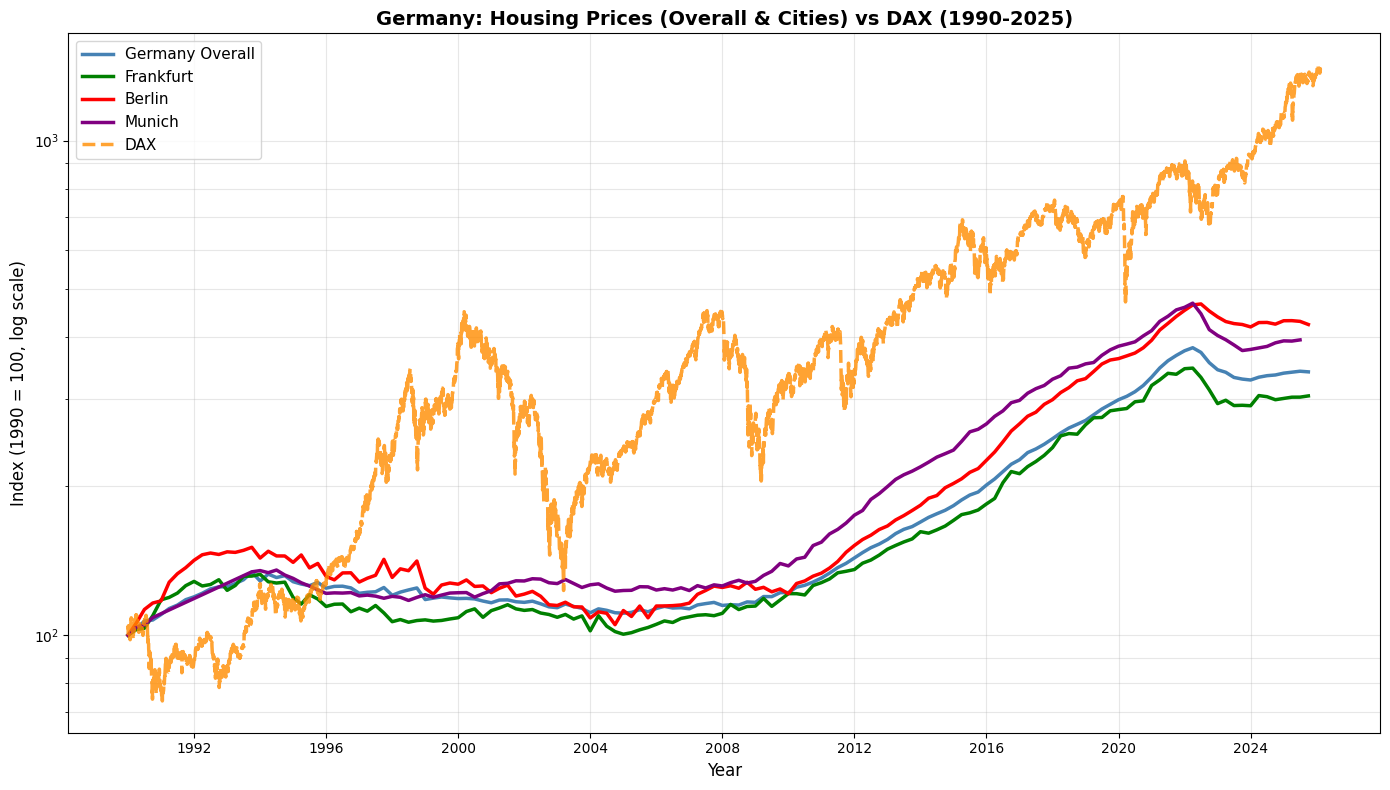

In [8]:
# Normalize all German housing data to 100 at Q1 1990
base_date_germany = pd.Timestamp(year=1990, month=1, day=1)
df_germany_norm = df_germany.copy()

for col in df_germany.columns:
    base_value = df_germany.loc[base_date_germany, col]
    df_germany_norm[col] = (df_germany[col] / base_value) * 100

# Normalize DAX to 100 at 1990
dax_1990 = stock_data['Germany'][stock_data['Germany'].index.year == 1990].iloc[0]
dax_normalized = (stock_data['Germany'] / dax_1990) * 100

# Create the plot
plt.figure(figsize=(14, 8))

# Define colors for different series
colors = {'GREIX (Eigentumswohnungen)': 'steelblue',
          'Frankfurt am Main (Eigentumswohnungen)': 'green',
          'Berlin (Eigentumswohnungen)': 'red',
          'München (Eigentumswohnungen)': 'purple'}

# Define labels
labels = {'GREIX (Eigentumswohnungen)': 'Germany Overall',
          'Frankfurt am Main (Eigentumswohnungen)': 'Frankfurt',
          'Berlin (Eigentumswohnungen)': 'Berlin',
          'München (Eigentumswohnungen)': 'Munich'}

# Plot housing data for Germany and cities
for col in df_germany_norm.columns:
    plt.plot(df_germany_norm.index, df_germany_norm[col], 
             linewidth=2.5, label=labels[col], color=colors[col])

# Plot DAX
plt.plot(dax_normalized.index, dax_normalized, 
         linewidth=2.5, label='DAX', color='darkorange', linestyle='--', alpha=0.8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (1990 = 100, log scale)', fontsize=12)
plt.title('Germany: Housing Prices (Overall & Cities) vs DAX (1990-2025)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3, which='both')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [10]:
# Load Germany-specific housing price data
df_germany = pd.read_csv('data/Germany_Housing_Price_Index_City_Parts.csv', sep=';', decimal=',')

df_germany = df_germany.set_index('year')

# Display the first few rows
df_germany.head()

,Munich (Altstadt - Maxvorstadt),Berlin (Wedding - Gesundbrunnen),Munich (Aubing - Laim - Pasing),Berlin (Charlottenburg)
year,,,,
1990,74.22,87.92,89.74,78.50
1991,81.82,107.80,96.03,105.23
1992,90.21,120.68,102.76,113.62
1993,99.46,120.65,109.97,117.00
1994,100.67,117.24,110.43,116.97


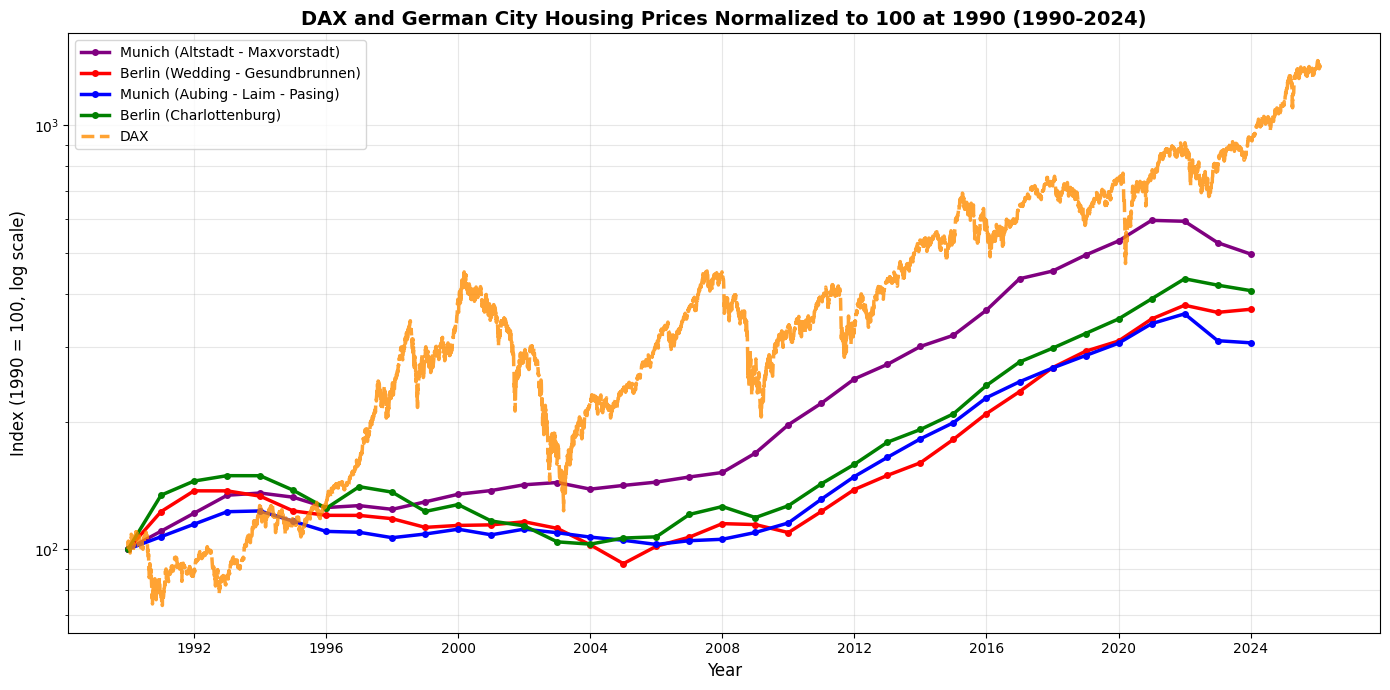

In [13]:
# Normalize city parts data to 100 at 1990
df_city_parts_norm = df_germany.copy()
for col in df_germany.columns:
    base_value_1990 = df_germany.loc[1990, col]
    df_city_parts_norm[col] = (df_germany[col] / base_value_1990) * 100

# Convert year index to datetime for proper plotting with DAX
df_city_parts_norm.index = pd.to_datetime(df_city_parts_norm.index, format='%Y')

# Plot DAX and city parts housing prices normalized to 100 at 1990
plt.figure(figsize=(14, 7))

# Define colors for city parts
city_colors = {
    'Munich (Altstadt - Maxvorstadt)': 'purple',
    'Berlin (Wedding - Gesundbrunnen)': 'red',
    'Munich (Aubing - Laim - Pasing)': 'blue',
    'Berlin (Charlottenburg)': 'green'
}

# Plot housing prices for each city part
for col in df_city_parts_norm.columns:
    plt.plot(df_city_parts_norm.index, df_city_parts_norm[col], 
             linewidth=2.5, label=col, color=city_colors[col], marker='o', markersize=4)

# Plot DAX
plt.plot(dax_normalized.index, dax_normalized, linewidth=2.5, color='darkorange', 
         label='DAX', linestyle='--', alpha=0.8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (1990 = 100, log scale)', fontsize=12)
plt.title('DAX and German City Housing Prices Normalized to 100 at 1990 (1990-2024)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3, which='both')
plt.yscale('log')

plt.tight_layout()
plt.show()